<h1><center> NeuroML-DB Analysis - Initial Plots for Model + Experiment Embedding </center></h1>

In [33]:
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import os
sns.set(font_scale=1.5)
import pandas as pd
import hdbscan

In [35]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')
path2figs = os.path.join(cwd,'figures')



In [36]:
filename = join(path2data,'new_cortical_ephys_no_trans.csv')
model_ephys_no_trans_df = pd.read_csv(filename,index_col=0) # updated version of df_no_trans
model_ephys_df = model_ephys_no_trans_df.copy()

filename = join(path2data,'experiment_ephys_no_trans.csv')
exp_ephys_no_trans_df = pd.read_csv(filename,index_col=0) # updated version of df_no_trans
exp_ephys_df = exp_ephys_no_trans_df.copy()



In [44]:
from scipy.stats import mannwhitneyu

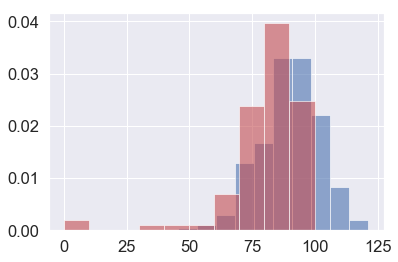

In [45]:
features = model_ephys_no_trans_df.columns.tolist()

# example difference in probability densities
for feature in features[0:1]:
    
    # grab model features
    model_samples = model_ephys_no_trans_df[feature].values
    plt.hist(model_samples,density=True,color='b',alpha=0.6)
    
    # grab experiment features
    exp_samples = exp_ephys_no_trans_df[feature].values
    plt.hist(exp_samples,density=True,color='r',alpha=0.6)
    

In [51]:
features = model_ephys_no_trans_df.columns.tolist()

Us = []
pvals = []
divergent_features = []

for feature in features:
    
    # grab model features
    model_samples = model_ephys_no_trans_df[feature].values
    
    # grab experiment features
    exp_samples = exp_ephys_no_trans_df[feature].values
   
    # Mann-Whitney U-test
    try:
        U, pval = mannwhitneyu(model_samples,exp_samples)
        
        alpha = 0.05
        if pval > alpha:
#             print('Failed to reject H0 (Same distribution) for %s' %feature)
            continue
        else:
            print('Reject H0 (different distribution) for %s for pval %.3f' %(feature,pval))
            Us.append(U)
            pvals.append(pval)
            divergent_features.append(feature)
        
    except ValueError: 
        # the two samples are identical
#         print('Samples are identical for %s' %feature)
        continue
        
    
   

Reject H0 (different distribution) for AHP1_depth_from_peak_1.5x for pval 0.000
Reject H0 (different distribution) for AHP2_depth_from_peak_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_depth_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_depth_abs_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_depth_abs_slow_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_depth_diff_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_depth_from_peak_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_slow_time_1.5x for pval 0.000
Reject H0 (different distribution) for AHP_time_from_peak_1.5x for pval 0.000
Reject H0 (different distribution) for AP1_amp_1.5x for pval 0.014
Reject H0 (different distribution) for AP1_begin_voltage_1.5x for pval 0.000
Reject H0 (different distribution) for AP1_begin_width_1.5x for pval 0.000
Reject H0 (different distribution) for AP1_peak_1.5x for pval 0.000
Reject H0 (different distribu

Reject H0 (different distribution) for amp_drop_first_last_3.0x for pval 0.000
Reject H0 (different distribution) for amp_drop_first_second_3.0x for pval 0.000
Reject H0 (different distribution) for burst_ISI_indices_3.0x for pval 0.000
Reject H0 (different distribution) for burst_mean_freq_3.0x for pval 0.015
Reject H0 (different distribution) for burst_number_3.0x for pval 0.001
Reject H0 (different distribution) for decay_time_constant_after_stim_3.0x for pval 0.000
Reject H0 (different distribution) for depol_block_3.0x for pval 0.000
Reject H0 (different distribution) for depolarized_base_3.0x for pval 0.000
Reject H0 (different distribution) for fast_AHP_3.0x for pval 0.000
Reject H0 (different distribution) for fast_AHP_change_3.0x for pval 0.000
Reject H0 (different distribution) for initburst_sahp_3.0x for pval 0.000
Reject H0 (different distribution) for initburst_sahp_ssse_3.0x for pval 0.000
Reject H0 (different distribution) for initburst_sahp_vb_3.0x for pval 0.000
Reject

In [52]:
inds = (-np.abs(Us)).argsort()

# top 6
descending_divergent_features = [divergent_features[i] for i in inds]
descending_Us = [Us[i] for i in inds]
descending_pvals = [pvals[i] for i in inds]

print(descending_divergent_features[:10])



['AP1DelaySDStrongStimTest_3.0x', 'AP1DelaySDTest_3.0x', 'AP1DelaySDTest_1.5x', 'AP1DelaySDStrongStimTest_1.5x', 'decay_time_constant_after_stim_1.5x', 'AP2DelaySDTest_1.5x', 'AP2DelaySDTest_3.0x', 'AP2DelaySDStrongStimTest_1.5x', 'AP2DelaySDStrongStimTest_3.0x', 'interburst_voltage_3.0x']


In [54]:
d_columns = descending_divergent_features

divergent_df = pd.DataFrame(columns = d_columns)

In [55]:
for feature in descending_divergent_features:
    try:
        model_features =  model_ephys_no_trans_df[feature].tolist()
    except KeyError:
        print(feature)
    exp_features =  exp_ephys_no_trans_df[feature].tolist()
    
    joint = model_features + exp_features
    
    divergent_df[feature] = pd.Series(joint)

divergent_df['Cluster'] = all_labels
divergent_df['ID'] = tsne_df['ID']

In [56]:
model_div_df = divergent_df[divergent_df.Cluster >= -1]
exp_div_df = divergent_df[divergent_df.Cluster == -2]

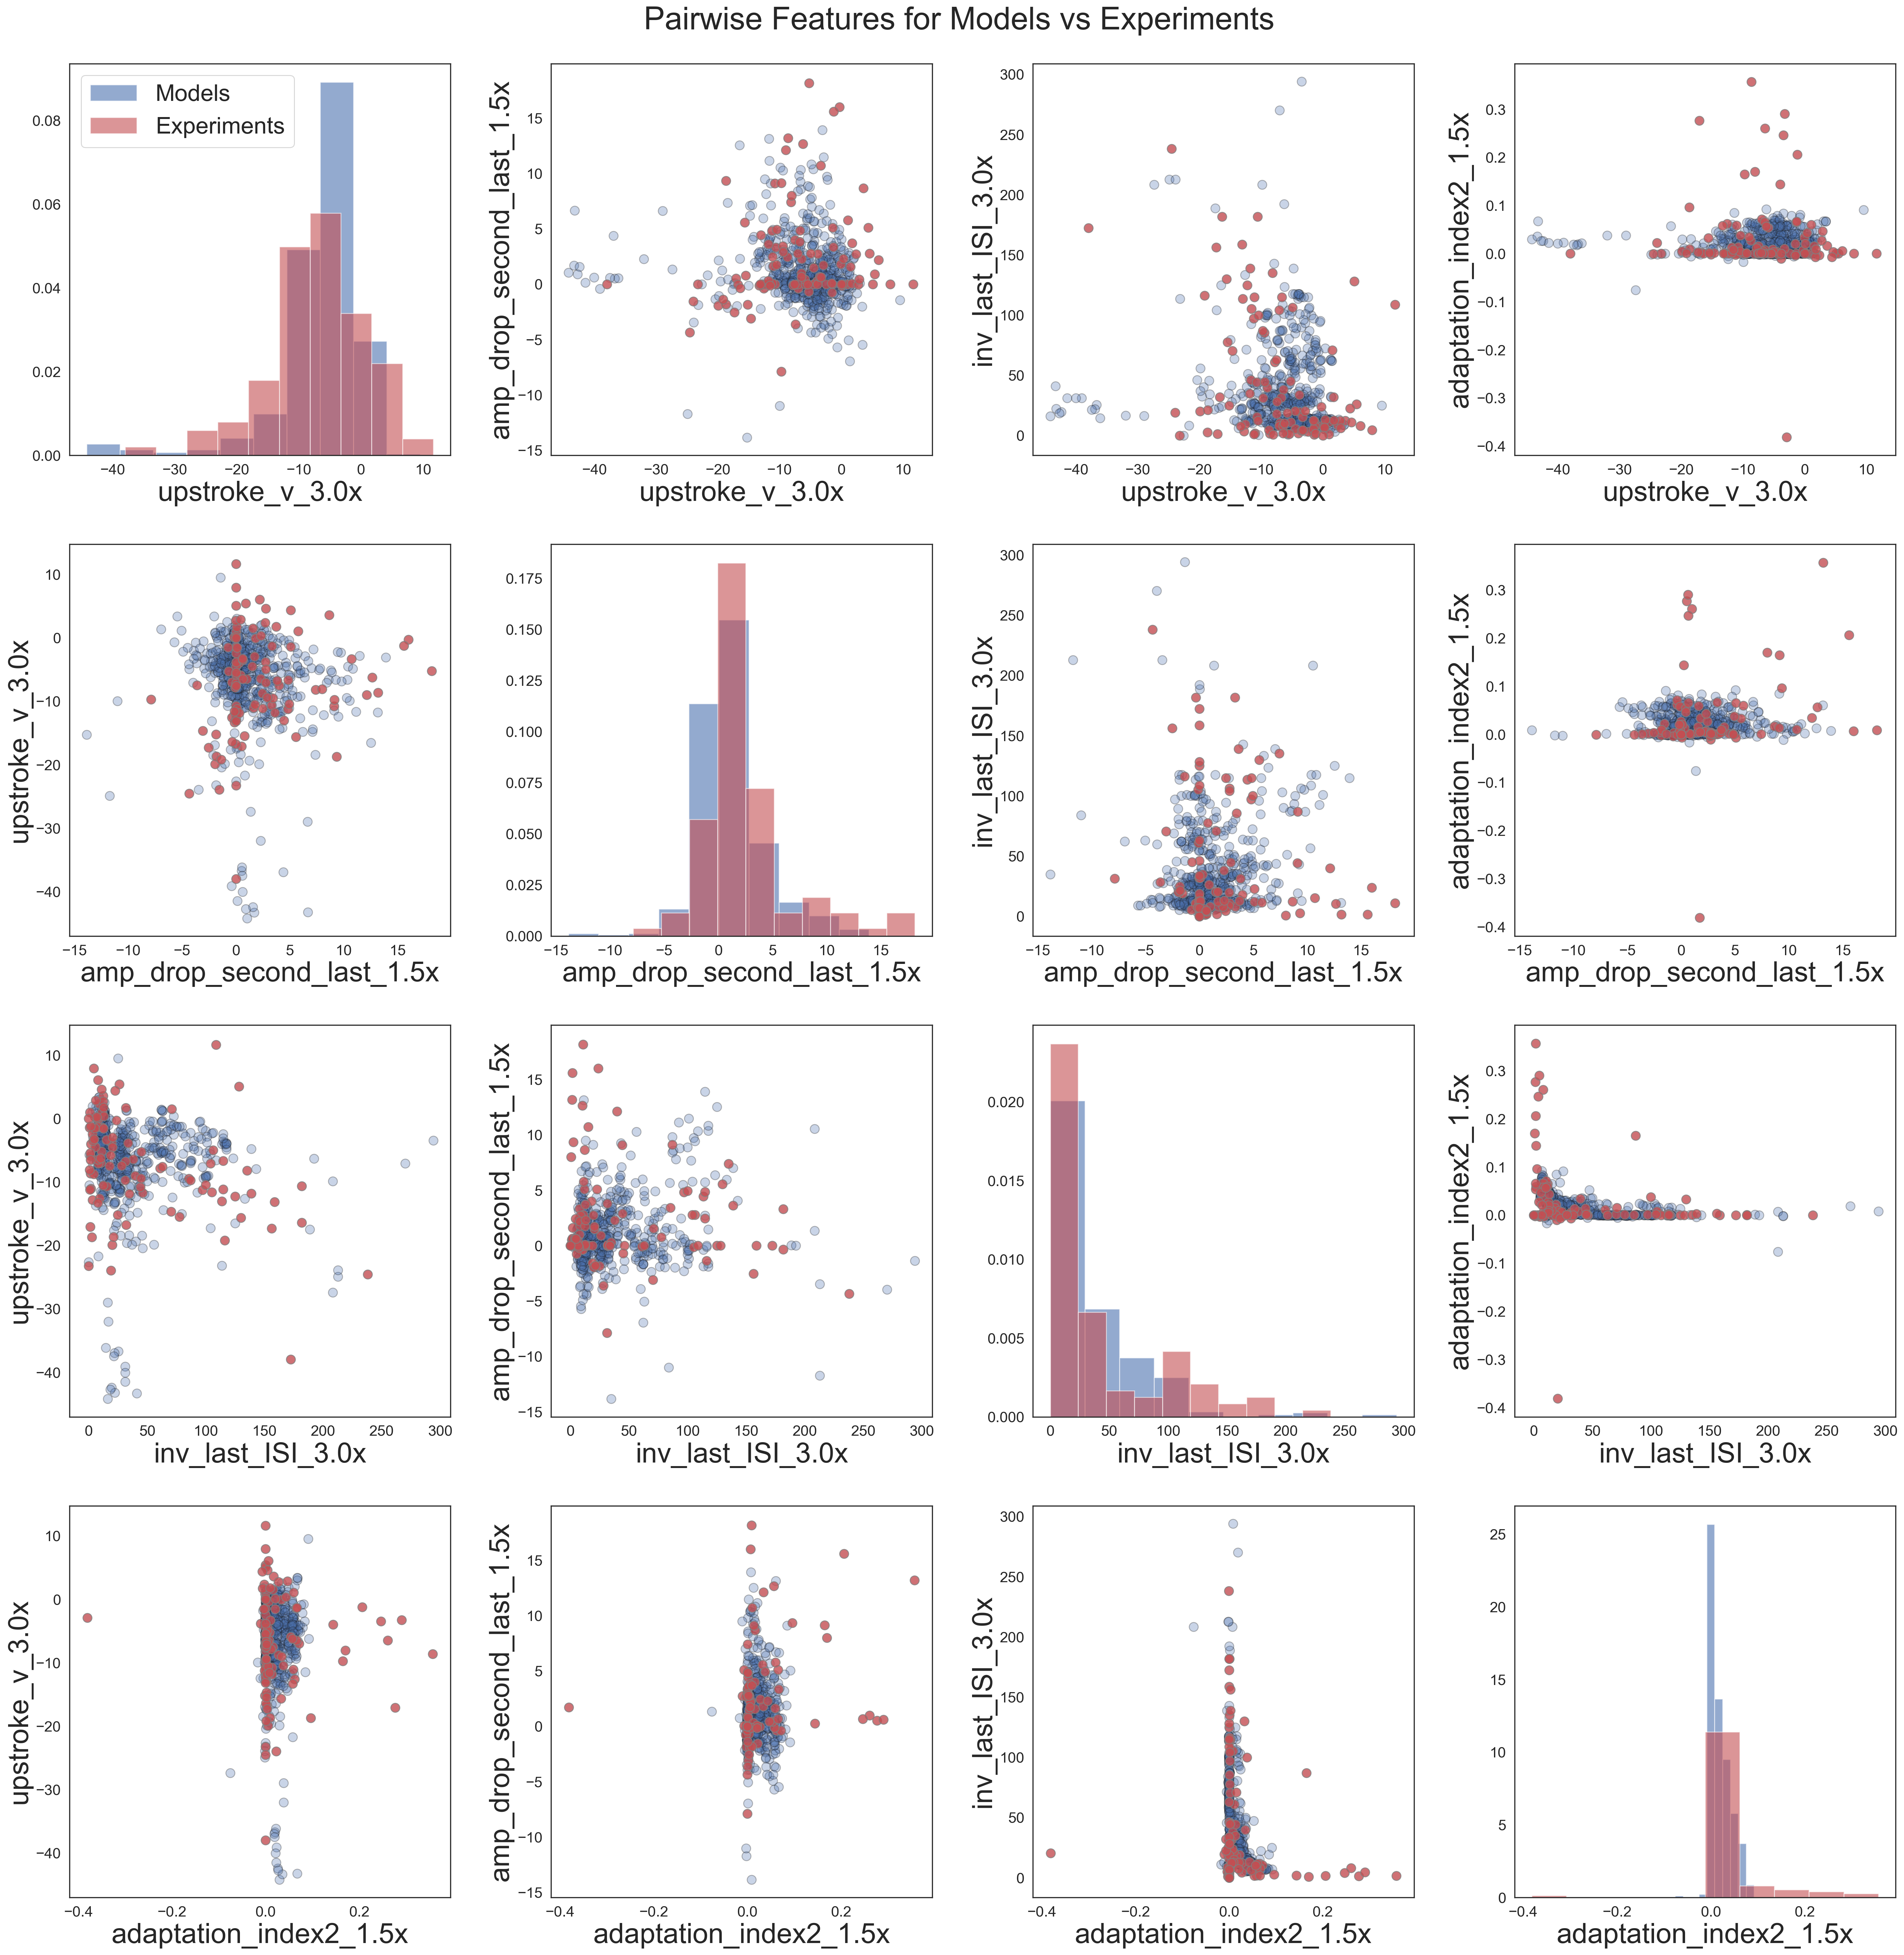

In [127]:

top_N = descending_divergent_features[18:22]
top_NxN = [(x,y) for x in top_N for y in top_N]

fig, ax = plt.subplots(4,4,figsize=(30,30),dpi=200)
ax=ax.ravel()

for i, (feature_1, feature_2) in enumerate(top_NxN):
    
    if feature_1 == feature_2:
        model_samples = model_div_df[feature_1].values
        ax[i].hist(model_samples, density=True, color='b',alpha=0.6)
        
        exp_samples = exp_div_df[feature_1].values
        ax[i].hist(exp_samples,density=True,color='r',alpha=0.6)
        
    else:


        ax[i].scatter(x=feature_1,y=feature_2,data=model_div_df,
                           c='b',s=100,
                           edgecolors='k',
                           alpha=0.3);

        ax[i].scatter(x=feature_1,y=feature_2,data=exp_div_df,
                           c='r',s=100,
                           edgecolors='gray',
                           alpha=0.8);

        
        ax[i].set_ylabel(feature_2,size='xx-large')
        
    ax[i].set_xlabel(feature_1,size='xx-large')
    
    if i == 0:
        ax[i].legend(['Models','Experiments'],fontsize='x-large', loc=2)


fig.suptitle('Pairwise Features for Models vs Experiments',y=1.01,fontsize=35)
plt.tight_layout()

path2file = os.path.join(path2figs,'model_exp_pair_plot.png')
plt.savefig(path2file,bbox_inches='tight')

In [84]:
top_N


['initburst_sahp_vb_1.5x',
 'InitialAccommodationMeanTest_1.5x',
 'InitialAccommodationMeanTest_3.0x',
 'upstroke_v_3.0x',
 'amp_drop_second_last_1.5x',
 'inv_last_ISI_3.0x']